<a href="https://colab.research.google.com/github/emmanuel-arize/Deep-learning-with-Tensorflow-keras/blob/master/notebook/convolution/Coding_Challenge_for_Fatima_Fellowship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fatima Fellowship Quick Coding Challenge (Pick 1)

Thank you for applying to the Fatima Fellowship. To help us select the Fellows and assess your ability to do machine learning research, we are asking that you complete a short coding challenge. Please pick **1 of these 5** coding challenges, whichever is most aligned with your interests. 

**Due date: 1 week**

**How to submit**: Please make a copy of this colab notebook, add your code and results, and submit your colab notebook to the submission link below. If you have never used a colab notebook, [check out this video](https://www.youtube.com/watch?v=i-HnvsehuSw).

**Submission link**: https://airtable.com/shrXy3QKSsO2yALd3

# 1. Deep Learning for Vision

**Upside down detector**: Train a model to detect if images are upside down

* Pick a dataset of natural images (we suggest looking at datasets on the [Hugging Face Hub](https://huggingface.co/datasets?task_categories=task_categories:image-classification&sort=downloads))
* Synthetically turn some of images upside down. Create a training and test set.
* Build a neural network (using Tensorflow, PyTorch, or any framework you like)
* Train it to classify image orientation until a reasonable accuracy is reached
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* Look at some of the images that were classified incorrectly. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

**Submission instructions**: Please write your code below and include some examples of images that were classified

In [2]:
pip install datasets

     |████████████████████████████████| 325 kB 12.6 MB/s 
     |████████████████████████████████| 212 kB 52.9 MB/s 
     |████████████████████████████████| 67 kB 4.9 MB/s 
     |████████████████████████████████| 1.1 MB 47.2 MB/s 
     |████████████████████████████████| 136 kB 51.8 MB/s 
     |████████████████████████████████| 127 kB 51.0 MB/s 
     |████████████████████████████████| 144 kB 50.5 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 271 kB 51.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

In [4]:
from datasets import load_dataset,Image,list_datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
from tensorflow.keras.preprocessing.image import img_to_array,load_img
import tensorflow as tf
from tensorflow import keras as K

In [5]:
plt.rcParams['image.cmap']='gray'

In [6]:
dataset=load_dataset("fashion_mnist")

Extracting data files:   0%|          | 0/4 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/.cache/huggingface/datasets/fashion_mnist/fashion_mnist/1.0.0/8d6c32399aa01613d96e2cbc9b13638f359ef62bb33612b077b4c247f6ef99c1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [24]:
train=dataset['train']
test=dataset['test']

In [25]:
train.column_names,test.column_names

(['image', 'label'], ['image', 'label'])

In [26]:
def load_array(data):
    images=data['image']
    labels=data['label']
    x=[np.array(img, dtype=np.float32)/255.0 for img in images]
    y=[label for label in labels]
    return x,y

In [27]:
x_train,y_train=load_array(train)
x_test,y_test=load_array(test)

In [28]:
y_train=np.int8(y_train)
y_test=np.int8(y_test)

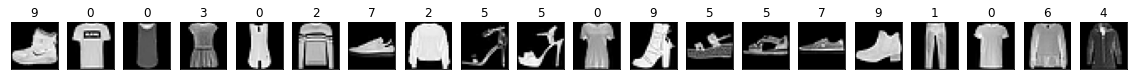

In [29]:
n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.title(y_train[i])
    plt.imshow(x_train[i])
    
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [30]:
for i,img in enumerate(y_train):
    if img==5:
        x_train[i]=np.flipud(x_train[i])
        y_train[i]=1
    elif img==7:
        x_train[i]=np.flipud(x_train[i])
        y_train[i]=1
    elif img==1:
        x_train[i]=np.flipud(x_train[i])
        y_train[i]=1
    elif img==9:
        x_train[i]=np.flipud(x_train[i])
        y_train[i]=1
    else:
        x_train[i]=x_train[i]
        y_train[i]=0
    

In [31]:
for i,img in enumerate(y_test):
    if img==5:
        x_test[i]=np.flipud(x_test[i])
        y_test[i]=1
    elif img==7:
        x_test[i]=np.flipud(x_test[i])
        y_test[i]=1
    elif img==1:
        x_test[i]=np.flipud(x_test[i])
        y_test[i]=1
    elif img==9:
        x_test[i]=np.flipud(x_test[i])
        y_test[i]=1
    else:
        x_test[i]=x_test[i]
        y_test[i]=0
    

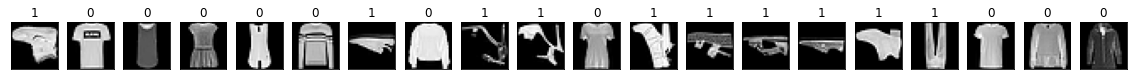

In [32]:
n = 20
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.title(y_train[i])
    plt.imshow(x_train[i])
    
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
   
plt.show()

In [33]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [34]:
y_train

array([1, 0, 0, ..., 0, 0, 1], dtype=int8)

In [35]:
K.backend.clear_session()

In [36]:
model=K.models.Sequential([
        K.layers.InputLayer(input_shape=(28,28,1)),
        K.layers.Conv2D(filters=32,kernel_size=4,padding='same'),
        K.layers.BatchNormalization(),
        K.layers.Activation('relu'),
        K.layers.MaxPool2D(pool_size=2,strides=2),
        K.layers.Conv2D(32,kernel_size=4),
        K.layers.BatchNormalization(),
        K.layers.Activation('relu'),
        K.layers.MaxPool2D(pool_size=2,strides=2),
        K.layers.Flatten(),
        K.layers.Dense(120,activation='relu'),
        K.layers.Dropout(0.3),
        K.layers.Dense(1,activation='sigmoid')
             ])

In [37]:
model.compile( optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        544       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 32)       1

In [39]:
history=model.fit(x_train,y_train,batch_size=100,epochs=10,validation_split=.3)

Epoch 1/10
420/420 [==============================] - 15s 11ms/step - loss: 0.0409 - accuracy: 0.9857 - val_loss: 0.0361 - val_accuracy: 0.9952
Epoch 2/10
420/420 [==============================] - 4s 9ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0095 - val_accuracy: 0.9972
Epoch 3/10
420/420 [==============================] - 4s 10ms/step - loss: 0.0067 - accuracy: 0.9975 - val_loss: 0.0094 - val_accuracy: 0.9968
Epoch 4/10
420/420 [==============================] - 4s 9ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0143 - val_accuracy: 0.9961
Epoch 5/10
420/420 [==============================] - 4s 9ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.0255 - val_accuracy: 0.9935
Epoch 6/10
420/420 [==============================] - 4s 9ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0086 - val_accuracy: 0.9976
Epoch 7/10
420/420 [==============================] - 4s 9ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0138 - val_accuracy: 0.9968
Epo

In [40]:
model.save('my_mnist_model')

INFO:tensorflow:Assets written to: my_mnist_model/assets


In [41]:
model=K.models.load_model('my_mnist_model')

In [42]:
test_loss, test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0134 - accuracy: 0.9971


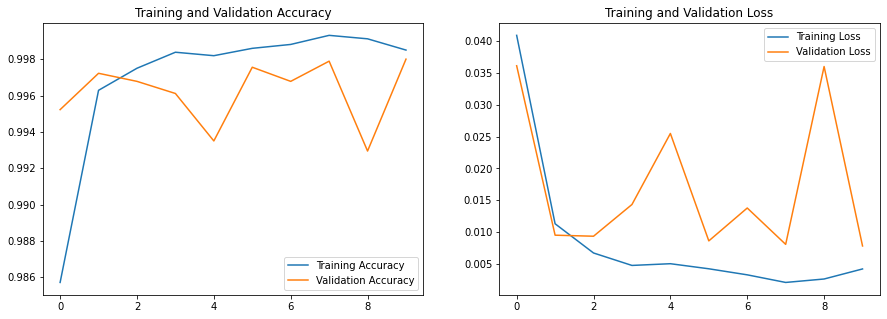

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [45]:
print('actual labels')
print(y_test[:20])
print('predicted labels')
print(predictions[:20])

actual labels
[1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0]
predicted labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [48]:
import cv2

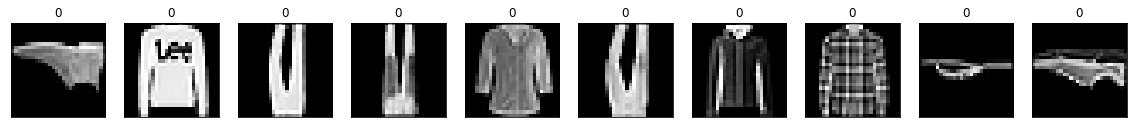

In [49]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.title(predictions[i])
    plt.imshow(cv2.resize(x_test[i],(28,28)))
    
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [50]:
train_label=pd.DataFrame({'label':y_train})

In [51]:
train_label['label']=pd.Categorical(train_label.label,ordered=True,categories=[0, 1])

In [52]:
train_label.label.value_counts()

0    36000
1    24000
Name: label, dtype: int64

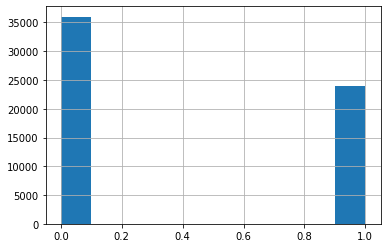

In [53]:
train_label.label.hist()

 Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

from the  predicted result we can see that the model was not able to correctly classified some of the images which were turn upside down which was labelled as **1**. This could be as a result of the imbalanced nature of the dataset with images upside down containing only 24000 out of the 60000 observations used in training the  model, so in the furture I will increase the  size of the images turn upside down with label **1** to that of the class label **0** through a Resampling technique.

[link to my model on Hugging Face Hub](https://huggingface.co/arize/Deep-Learning-with-Tensorflow-Keras/blob/main/Coding_Challenge_for_Fatima_Fellowship.ipynb)

**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified images. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

# 2. Deep Learning for NLP

**Fake news classifier**: Train a text classification model to detect fake news articles!

* Download the dataset here: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset
* Develop an NLP model for classification that uses a pretrained language model
* Finetune your model on the dataset, and generate an AUC curve of your model on the test set of your choice. 
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* *Answer the following question*: Look at some of the news articles that were classified incorrectly. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified news articles. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

# 3. Deep RL / Robotics

**RL for Classical Control:** Using any of the [classical control](https://github.com/openai/gym/blob/master/docs/environments.md#classic-control) environments from OpenAI's `gym`, implement a deep NN that learns an optimal policy which maximizes the reward of the environment.

* Describe the NN you implemented and the behavior you observe from the agent as the model converges (or diverges).
* Plot the reward as a function of steps (or Epochs).
Compare your results to a random agent.
* Discuss whether you think your model has learned the optimal policy and potential methods for improving it and/or where it might fail.
* (Optional) [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.


You may use any frameworks you like, but you must implement your NN on your own (no pre-defined/trained models like [`stable_baselines`](https://stable-baselines.readthedocs.io/en/master/)).

You may use any simulator other than `gym` _however_:
* The environment has to be similar to the classical control environments (or more complex like [`robosuite`](https://github.com/ARISE-Initiative/robosuite)).
* You cannot choose a game/Atari/text based environment. The purpose of this challenge is to demonstrate an understanding of basic kinematic/dynamic systems.

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

**Write up**: 
* (Optional) link to the model on Hugging Face Hub: 
* Discuss whether you think your model has learned the optimal policy and potential methods for improving it and/or where it might fail.

# 4. Theory / Linear Algebra 

**Implement Contrastive PCA** Read [this paper](https://www.nature.com/articles/s41467-018-04608-8) and implement contrastive PCA in Python.

* First, please discuss what kind of dataset this would make sense to use this method on
* Implement the method in Python (do not use previous implementations of the method if they already exist)
* Then create a synthetic dataset and apply the method to the synthetic data. Compare with standard PCA.


**Write up**: Discuss what kind of dataset it would make sense to use Contrastive PCA

In [ ]:
### WRITE YOUR CODE HERE

# 5. Systems

**Inference on the edge**: Measure the inference times in various computationally-constrained settings

* Pick a few different speech detection models (we suggest looking at models  on the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=downloads))
* Simulate different memory constraints and CPU allocations that are realistic for edge devices that might run such models, such as smart speakers or microcontrollers, and measure what is the average inference time of the models under these conditions 
* How does the inference time vary with (1) choice of model (2) available system memory (3) available CPU (4) size of input?

Are there any surprising discoveries? (Note that this coding challenge is fairly open-ended, so we will be considering the amount of effort invested in discovering something interesting here).

In [ ]:
### WRITE YOUR CODE HERE

**Write up**: What surprising discoveries do you see?